# **Building a Naive Bayes classifier Using GaussianNB()**

In [ ]:
from sklearn.naive_bayes import GaussianNB

x = []
y = []
with open("/content/drive/MyDrive/datasets/data_multivar.txt",'r') as f:
  for data in f.readlines():
    data = data.split(',')
    x.append([float(i) for i in data[:2]])
    y.append(float(data[2]))

In [ ]:
import numpy as np
x = np.array(x)
y = np.array(y)

In [ ]:
gnbc = GaussianNB()
gnbc.fit(x,y)
ypredict = gnbc.predict(x)

In [ ]:
accuracy = (sum(y==ypredict)/len(y))*100.0
print("Accuracy = ",accuracy,"%")

Accuracy =  99.5 %


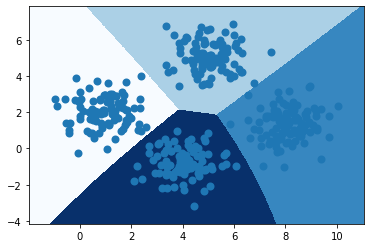

In [ ]:
import matplotlib.pyplot as plt
def plot_Graph(gnbc,x,y):
  xmin,xmax = min(x[:,0])-1.0,max(x[:,0])+1.0
  ymin,ymax = min(x[:,1])-1.0,max(x[:,1])+1.0
  xdata,ydata = np.meshgrid(np.arange(xmin,xmax,0.01),np.arange(ymin,ymax,0.01))
  mesh_output = gnbc.predict(np.c_[xdata.ravel(),ydata.ravel()])
  mesh_output = mesh_output.reshape(xdata.shape)
  plt.pcolormesh(xdata,ydata,mesh_output,cmap=plt.cm.Blues)
  plt.scatter(x[:,0],x[:,1],linewidths=2)
plot_Graph(gnbc,x,y)

# **Splitting the dataset for training and testing**

In [ ]:
from sklearn import model_selection

xtrain,xtest,ytrain,ytest = model_selection.train_test_split(x,y,train_size=0.75,random_state=6)

In [ ]:
gnbc1 = GaussianNB()
gnbc1.fit(xtrain,ytrain)
ytest_predict = gnbc1.predict(xtest)

In [ ]:
accuracy = (sum(ytest==ytest_predict)/len(ytest))*100.0
print("Accuracy = ",accuracy,"%")


Accuracy =  100.0 %


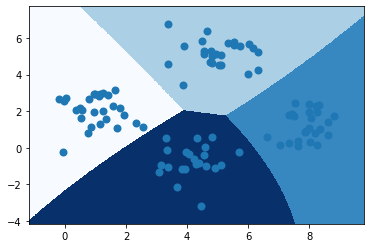

In [ ]:
plot_Graph(gnbc1,xtest,ytest)

# **Evaluating the accuracy**

In [ ]:
from sklearn.model_selection import cross_val_score

accuracy = cross_val_score(gnbc,x,y,scoring="accuracy",cv=5)
print('Accuracy : ',round(accuracy.mean() *100.0,2),'%')

precision = cross_val_score(gnbc,x,y,scoring="precision_weighted",cv=5)
print('Precision : ',round(precision.mean() *100.0,2),'%')

recall = cross_val_score(gnbc,x,y,scoring="recall_weighted",cv=5)
print('Recall : ',round(recall.mean() *100.0,2),'%')

f1Score = cross_val_score(gnbc,x,y,scoring="f1_weighted",cv=5)
print('f1 Score : ',round(f1Score.mean() *100.0,2),'%')

Accuracy :  99.5 %
Precision :  99.52 %
Recall :  99.5 %
f1 Score :  99.5 %


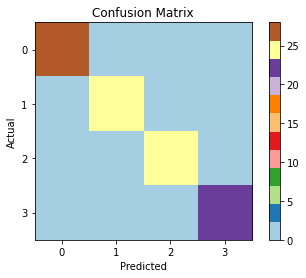

In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(ytest,ytest_predict)

def plot_confusion_matrix(conf_matrix):
  plt.imshow(conf_matrix,interpolation='nearest',cmap= plt.cm.Paired)
  plt.colorbar()
  plt.title("Confusion Matrix")
  plt.xticks(np.arange(4),np.arange(4))
  plt.yticks(np.arange(4),np.arange(4))
  plt.xlabel("Predicted")
  plt.ylabel("Actual")


plot_confusion_matrix(conf_matrix)

# **Extracting the performance report**

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(ytest,ytest_predict,[0,1,2,3])
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        25
           2       1.00      1.00      1.00        25
           3       1.00      1.00      1.00        22

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

